## 指定のディレクトリからデータを読みだして学習に掛ける

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

In [2]:
with open("./t_fal_audio_data/np_data.dat", mode="rb") as f:
    data=np.fromfile(f,dtype=float)

### データは1配列で返されるので書き込み時の状態に変換する

In [3]:
size=2**12 #サンプリングのデータサイズを入力
n=int(len(data)/(size+1))

data=data.reshape((n, size+1))

print(type(data))
print(len(data))
print(len(data[0]))
print(data[0])

<class 'numpy.ndarray'>
40
4097
[0.214      0.11075341 0.15259981 ... 0.02155629 0.05022515 0.15259981]


In [4]:
temp_data=np.array([])
sound_data=np.array([])
for i in range(len(data)):
    temp_data=np.append(temp_data, data[i][0].real)
    sound_data=np.append(sound_data, data[i][1:])

sound_data=sound_data.reshape((n,size))

"""
temp_data:測定温度の配列(float)
sound_data:音声スペクトルデータの2次元配列([[complex]...[]])
"""

    
print(len(sound_data[0]))
print(temp_data)
print(type(temp_data[0]))

4096
[0.214 0.24  0.265 0.345 0.308 0.346 0.33  0.34  0.42  0.38  0.431 0.423
 0.482 0.479 0.501 0.503 0.513 0.579 0.55  0.567 0.592 0.689 0.636 0.661
 0.671 0.69  0.718 0.759 0.75  0.775 0.856 0.795 0.831 0.833 0.861 0.91
 0.886 0.92  0.942 0.94 ]
<class 'numpy.float64'>


<font size=5 color="red">予測データの用意</font>

In [5]:
with open("./t_fal_audio_data/np_prediction_data.dat", mode="rb") as f:
    prediction_data=np.fromfile(f,dtype=float)

prediction_data=prediction_data.reshape((10,4097))

prediciton_temp_data=np.array([])
prediciton_sound_data=np.array([])
for i in range(len(prediction_data)):
    prediciton_temp_data=np.append(prediciton_temp_data, prediction_data[i][0])
    prediciton_sound_data=np.append(prediciton_sound_data, prediction_data[i][1:])
    
prediciton_sound_data=prediciton_sound_data.reshape((10,4096))

print(prediciton_temp_data)
print(prediciton_sound_data)

[33.  42.2 49.8 60.5 67.  70.5 75.9 82.1 85.8 91.7]
[[0.07170207 0.08974837 0.0852675  ... 0.07528725 0.0852675  0.08974837]
 [0.081953   0.09420389 0.10618163 ... 0.0246869  0.10618163 0.09420389]
 [0.17753448 0.0796667  0.05342869 ... 0.11737094 0.05342869 0.0796667 ]
 ...
 [0.01008851 0.07105503 0.08758143 ... 0.03424141 0.08758143 0.07105503]
 [0.11010878 0.07297494 0.02128973 ... 0.03864819 0.02128973 0.07297494]
 [0.03787634 0.02785253 0.10334471 ... 0.37592443 0.10334471 0.02785253]]


# TFのkerasで学習装置を実装してみる

In [40]:
model=keras.Sequential([
    keras.layers.Dense(4096, activation=tf.nn.relu, input_dim=4096),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

In [41]:
#optimizer = tf.train.RMSPropOptimizer(0.5)
optimizer = tf.train.AdamOptimizer()

def abs_percent(y_ture, y_pred):
    return 1-abs((y_pred-y_ture)/y_ture)
 
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=[abs_percent])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_14 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 18,945,941
Trainable params: 18,945,941
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/80
40/40 [==============================] - 2s 49ms/step - loss: 0.5283 - abs_percent: -0.1456
Epoch 2/80
40/40 [==============================] - 0s 4ms/step - loss: 0.3689 - abs_percent: 0.0529
Epoch 3/80
40/40 [==============================] - 0s 3ms/step - loss: 0.1032 - abs_percent: 0.5690
Epoch 4/80
40/40 [==============================] - 0s 3ms/step - loss: 0.1680 - abs_percent: 0.3723
Epoch 5/80
40/40 [==============================] - 0s 3ms/step - loss: 0.1116 - abs_percent: 0.5080
Epoch 6/80
40/40 [==============================] - 0s 3ms/step - loss: 0.0571 - abs_percent: 0.7132
Epoch 7/80
40/40 [==============================] - 0s 3ms/step - loss: 0.0760 - abs_percent: 0.6499
Epoch 8/80
40/40 [==============================] - 0s 3ms/step - loss: 0.0448 - abs_percent: 0.7385
Epoch 9/80
40/40 [==============================] - 0s 3ms/step - loss: 0.0568 - abs_percent: 0.6632
Epoch 10/80
40/40 [==============================] - 0s 3ms/step - loss: 0.0425 - abs_per

40/40 [==============================] - 0s 3ms/step - loss: 9.4420e-05 - abs_percent: 0.9837


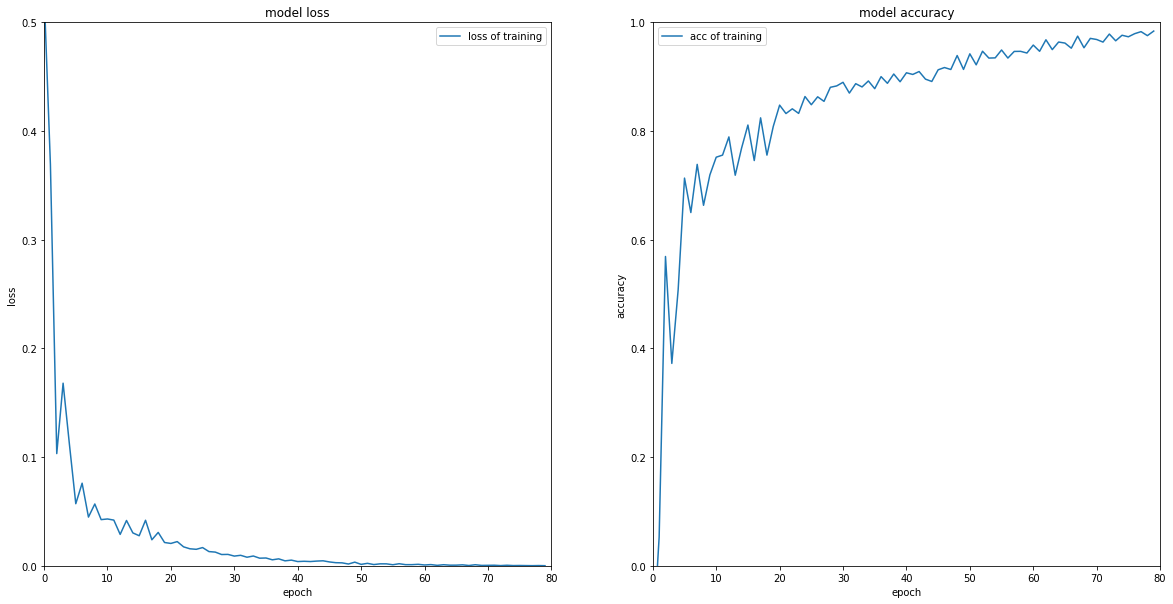

In [42]:
epochs=80

fit=model.fit(sound_data, temp_data, epochs=epochs, callbacks=None, validation_split=0)


plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.xlim(0,epochs)
plt.ylim(0, 0.5)
plt.plot(fit.history['loss'], label="loss of training")
try:
    plt.plot(fit.history['val_loss'], label="loss of validation")
except:
    pass
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.xlim(0,epochs)
plt.ylim(0, 1)
plt.plot(fit.history['abs_percent'], label="acc of training")
try:
    plt.plot(fit.history['val_abs_percent'], label="acc of validation")
except:
    pass
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [43]:
test_loss, test_acc = model.evaluate(sound_data, temp_data)

print("Test_loss:", test_loss)
print("Test_accuracy:", test_acc)

40/40 [==============================] - 0s 8ms/step
Test_loss: 0.00024885294842533765
Test_accuracy: 0.9749075412750244


In [44]:
test_loss, test_acc = model.evaluate(prediciton_sound_data, prediciton_temp_data)

print("Test_loss:", test_loss)
print("Test_accuracy:", test_acc)

10/10 [==============================] - 0s 3ms/step
Test_loss: 4591.51953125
Test_accuracy: 0.009376013651490211


## モデルで予想をしてみる

In [45]:
pre_temp=model.predict(sound_data)

print(type(pre_temp))

error=np.array([])
error_abs=np.array([])
for i in range(len(temp_data)):
    error=np.append(error, (pre_temp[i]-temp_data[i])/temp_data[i]*100)
    error_abs=np.append(error_abs, abs((pre_temp[i]-temp_data[i])/temp_data[i]*100))

np.set_printoptions(precision=2, suppress=True)
print(error)
print(error_abs)
print("error average is {:.2g} %".format(np.mean(error)))
print("error absolute average is {:.2g} %".format(np.mean(error_abs)))

<class 'numpy.ndarray'>
[ 9.87 -1.66 -6.43 -0.24  0.5  -2.99 -1.36 -0.14 -3.7  -0.35 -4.99 -1.96
 -6.68 -2.83 -2.25 -3.79 -3.94 -2.55 -5.11 -5.53 -1.19 -2.39 -2.24 -1.24
 -0.99 -2.88 -1.85 -2.05 -2.35 -1.05 -3.12 -0.9  -2.12 -2.54 -1.17 -1.09
 -0.99 -2.5   0.35 -0.49]
[9.87 1.66 6.43 0.24 0.5  2.99 1.36 0.14 3.7  0.35 4.99 1.96 6.68 2.83
 2.25 3.79 3.94 2.55 5.11 5.53 1.19 2.39 2.24 1.24 0.99 2.88 1.85 2.05
 2.35 1.05 3.12 0.9  2.12 2.54 1.17 1.09 0.99 2.5  0.35 0.49]
error average is -2 %
error absolute average is 2.5 %


In [46]:
pre_test_temp=model.predict(prediciton_sound_data)*100

test_error=np.array([])
test_error_abs=np.array([])
for i in range(len(prediciton_temp_data)):
    test_error=np.append(test_error, (pre_test_temp[i]-prediciton_temp_data[i])/prediciton_temp_data[i]*100)
    test_error_abs=np.append(test_error_abs, abs((pre_test_temp[i]-prediciton_temp_data[i])/prediciton_temp_data[i]*100))
    
print(test_error)
print("test error average is {:.2g} %".format(np.mean(test_error)))
print("absolute test error average is {:.2g} %".format(np.mean(test_error_abs)))

print(pre_test_temp)
print(prediciton_temp_data)

[ -9.14  33.58   8.33  -1.6    1.96 -25.87 -33.99   1.63 -26.89 -10.4 ]
test error average is -6.2 %
absolute test error average is 15 %
[[29.98]
 [56.37]
 [53.95]
 [59.53]
 [68.31]
 [52.26]
 [50.1 ]
 [83.44]
 [62.73]
 [82.16]]
[33.  42.2 49.8 60.5 67.  70.5 75.9 82.1 85.8 91.7]


In [13]:
print(pre_temp*100)

[[24.4 ]
 [25.54]
 [22.56]
 [35.81]
 [32.06]
 [35.82]
 [35.28]
 [34.97]
 [44.33]
 [42.8 ]
 [48.04]
 [45.95]
 [49.42]
 [50.44]
 [55.68]
 [51.18]
 [51.3 ]
 [58.73]
 [55.12]
 [53.56]
 [64.06]
 [72.77]
 [67.7 ]
 [69.15]
 [72.85]
 [73.38]
 [76.41]
 [77.6 ]
 [73.44]
 [74.14]
 [87.35]
 [88.69]
 [88.91]
 [83.25]
 [91.12]
 [95.74]
 [97.86]
 [49.07]
 [53.23]
 [41.36]]


### 過学習はなさそう。その代わり、どうしても解析できない部分の温度帯がある。
---
ともあれ、これが現状で一番のモデルであるので保存してリアルタイムの温度測定に用いてみる。
過学習の検証はそこで同時に行える。